# Fight Overfitting!

Exercise to feel & fight overfitting!

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


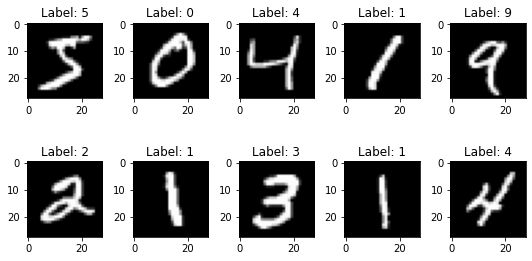

In [3]:
import matplotlib.pyplot as plt

num = 10
images = x_train[:num]
labels = np.argmax(y_train[:num], axis=1)

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [4]:
model = keras.Sequential()

model.add( layers.Flatten( input_shape=input_shape) )
model.add( keras.layers.Dense(256, activation='relu') )
model.add( keras.layers.Dense(512, activation='relu') )
model.add( keras.layers.Dense(256, activation='relu') )
model.add( layers.Flatten() )

model.add( layers.Dense(num_classes, activation="softmax") )

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 466,442
Trainable params: 466,442
Non-trainable params: 0
__________________________________________________

In [6]:
sgd = tf.keras.optimizers.SGD( learning_rate=0.02, name="SGD" )
adam = tf.keras.optimizers.Adam()


In [7]:
batch_size = 512
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

loss_graph = model.fit(x_train[:1000], y_train[:1000], batch_size=batch_size, epochs=epochs, validation_split=.2)

Epoch 1/50
2/2 [==============================] - 0s 135ms/step - loss: 2.2393 - accuracy: 0.2275 - val_loss: 1.9779 - val_accuracy: 0.5750
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 1.8557 - accuracy: 0.6425 - val_loss: 1.5801 - val_accuracy: 0.6950
Epoch 3/50
2/2 [==============================] - 0s 24ms/step - loss: 1.4131 - accuracy: 0.7375 - val_loss: 1.1525 - val_accuracy: 0.7450
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 0.9794 - accuracy: 0.7937 - val_loss: 0.8374 - val_accuracy: 0.8150
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 0.6646 - accuracy: 0.8363 - val_loss: 0.6676 - val_accuracy: 0.8200
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 0.4958 - accuracy: 0.8413 - val_loss: 0.6044 - val_accuracy: 0.8350
Epoch 7/50
2/2 [==============================] - 0s 26ms/step - loss: 0.4130 - accuracy: 0.8662 - val_loss: 0.5949 - val_accuracy: 0.8400
Epoch 8/50
2/2 [==========

<AxesSubplot:>

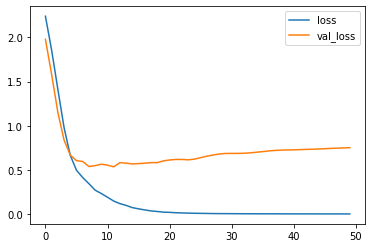

In [8]:
pd.DataFrame( loss_graph.history )[['loss', 'val_loss']].plot()

<AxesSubplot:>

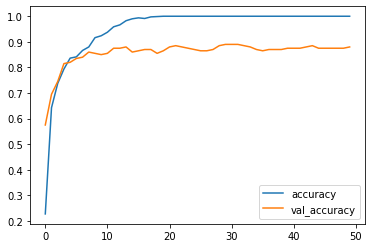

In [9]:
pd.DataFrame( loss_graph.history )[['accuracy', 'val_accuracy']].plot()

In [10]:
# accuracy on test set

np.mean( np.argmax(model.predict(x_test), axis=1) == np.argmax(y_test,axis=1) )

0.8824

## Oh No! Overfitting!

- The Parameters of the last layer is 2570, why?

- Name 3 strategies to fight overfitting!

- Pick one method, and try fight overfitting without lowering the **Trainable params: 466,442**